<!DOCTYPE html>
<html>
<head>
</head>
<body>
<h1>WHAT IS K NEAREST NEIGHBOUR</h1>
<p>KNN is a Supervised Machine Learning Model that uses the assumption of proximity or closeness to classify data points. In KNN, an object is classified by a majority vote of its neighbors, with the object being assigned to the class that is most common among its k nearest neighbors. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.</p>
<p>It follows the saying that "Show me your friend, I will tell you who you are", "Birds of a feather flock together."</p>
<p>KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) to calculate the distance between points on a graph.</p>
<p>How then is this promixity calculated? The distance between the object and its neighbors is calculated using a distance metric such as Euclidean distance or Manhattan distance. Although, there are other ways of calculating distance, and one way might be preferable depending on the problem we are solving. However, the straight-line distance (also called the Euclidean distance) is a popular and familiar choice.</p>
<p>In a nutshell, nearest neighbors are those data points that have minimum distance from our new data point. And K is the number of such data points we consider in our implementation of the algorithm. Therefore, distance metric and K value are two important considerations while using the KNN algorithm. Apart from the Euclidean Distance, you can also use Hamming distance, Manhattan distance, Minkowski distance as per your need. For predicting class/ continuous value for a new data point, it considers all the data points in the training dataset. Finds new data point’s ‘K’ Nearest Neighbors (Data points) from feature space and their class labels or continuous values.</p>
<li>For a Classification Problem, it selects the mode of the nearest data points.</li>
<li>For a Regression Problem, it selects the mean of the Nearest data points.</li>
<b>Its important to note the following:</b><ol><li>Instance-based learning: Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.</li>
<li>Lazy Learning: The algorithm is called "lazy" because it doesn't build a model beforehand, instead waits until a prediction is needed to make a decision. The model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.</li>
<li>Non-Parametric: In KNN, there is no predefined form of the mapping function.</ol> 


<a href = "https://www.analyticsvidhya.com/blog/2021/04/simple-understanding-and-implementation-of-knn-algorithm/">K Nearest Neighbour Extra Reading 1</a><br>
<a href = "https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761#:~:text=KNN%20works%20by%20finding%20the,in%20the%20case%20of%20regression).">K Nearest Neighbour Extra Reading 2</a><br>

<h4>KIDNEY DISEASE</h4>

The Aim of this project is to create a Machine Learning Model to capture the patterns in a human body that predicts the occurence of a kidney disease. <br>
Using Classification Report, the ROC, the AUC, and the Confusion Matrix, verify the accuracy of your model

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [385]:
data = pd.read_csv('dataset\kidney_disease.csv')

In [386]:
kd = data.copy()
kd.head(3)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [387]:
kd.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells',
                     'pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea',
                     'sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume',
                     'wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus',
                     'cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'classes'},inplace=True)
kd.head(1)

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd


In [388]:
kd.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
classes                      0
dtype: int64

In [389]:
kd.classes.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classes, dtype: int64

In [390]:
kd= kd.loc[kd['classes'] != 'ckd\t']
kd['classes'].value_counts()

ckd       248
notckd    150
Name: classes, dtype: int64

In [391]:
# -----------------split into train and test---------------------

train = kd.sample(350)
test = kd.sample(50)

# export the test data file
test.to_csv('KidneyDiseaseTest.csv')

In [392]:
test.classes.value_counts()

ckd       31
notckd    19
Name: classes, dtype: int64

In [393]:
train.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific gravity            41
albumin                     40
sugar                       42
red blood cells            132
pus cell                    59
pus cell clumps              4
bacteria                     4
blood glucose random        39
blood urea                  18
serum creatinine            16
sodium                      83
potassium                   84
hemoglobin                  47
packed cell volume          63
white blood cell count      95
red blood cell count       119
hypertension                 1
diabetes mellitus            1
coronary artery disease      1
appetite                     1
pedal edema                  1
anemia                       1
classes                      0
dtype: int64

In [394]:
cat = train.select_dtypes(include = ['object', 'category'])
num = train.select_dtypes(include = 'number')

In [395]:
train

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
199,199,65.0,80.0,1.015,0.0,0.0,NaN,normal,notpresent,notpresent,92.0,37.0,1.5,140.0,5.2,8.8,25,10700,3.2,yes,no,yes,good,yes,no,ckd
219,219,68.0,90.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,238.0,57.0,2.5,NaN,NaN,9.8,28,8000,3.3,yes,yes,no,poor,no,no,ckd
62,62,15.0,60.0,1.020,3.0,0.0,NaN,normal,notpresent,notpresent,86.0,15.0,0.6,138.0,4.0,11.0,33,7700,3.8,yes,yes,no,good,no,no,ckd
55,55,35.0,80.0,1.005,3.0,0.0,abnormal,normal,notpresent,notpresent,NaN,NaN,NaN,NaN,NaN,9.5,28,NaN,NaN,no,no,no,good,yes,no,ckd
333,333,23.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,99.0,46.0,1.2,142.0,4.0,17.7,46,4300,5.5,no,no,no,good,no,no,notckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,6.0,60.0,1.010,4.0,0.0,abnormal,abnormal,notpresent,present,94.0,67.0,1.0,135.0,4.9,9.9,30,16700,4.8,no,no,no,poor,no,no,ckd
377,377,64.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,97.0,27.0,0.7,145.0,4.8,13.8,49,6400,4.8,no,no,no,good,no,no,notckd
257,257,38.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,91.0,36.0,0.7,135.0,3.7,14.0,46,9100,5.8,no,no,no,good,no,no,notckd
76,76,48.0,80.0,1.005,4.0,0.0,abnormal,abnormal,notpresent,present,133.0,139.0,8.5,132.0,5.5,10.3,36,\t6200,4,no,yes,no,good,yes,no,ckd


In [396]:
# to convert the cloumns that meant to be in int (but in object) back to it correct datatype
train['packed cell volume'] = pd.to_numeric(train['packed cell volume'], errors = 'coerce')
train['red blood cell count'] = pd.to_numeric(train['packed cell volume'], errors = 'coerce')
train['white blood cell count'] = pd.to_numeric(train['white blood cell count'], errors = 'coerce')

# Check if the corrections has been effected
train.select_dtypes(include = ['object', 'category'])

,red blood cells,pus cell,pus cell clumps,bacteria,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
199,NaN,normal,notpresent,notpresent,yes,no,yes,good,yes,no,ckd
219,NaN,normal,notpresent,notpresent,yes,yes,no,poor,no,no,ckd
62,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
55,abnormal,normal,notpresent,notpresent,no,no,no,good,yes,no,ckd
333,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
...,...,...,...,...,...,...,...,...,...,...,...
190,abnormal,abnormal,notpresent,present,no,no,no,poor,no,no,ckd
377,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
257,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
76,abnormal,abnormal,notpresent,present,no,yes,no,good,yes,no,ckd


In [397]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 199 to 83
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       350 non-null    int64  
 1   age                      341 non-null    float64
 2   blood_pressure           338 non-null    float64
 3   specific gravity         309 non-null    float64
 4   albumin                  310 non-null    float64
 5   sugar                    308 non-null    float64
 6   red blood cells          218 non-null    object 
 7   pus cell                 291 non-null    object 
 8   pus cell clumps          346 non-null    object 
 9   bacteria                 346 non-null    object 
 10  blood glucose random     311 non-null    float64
 11  blood urea               332 non-null    float64
 12  serum creatinine         334 non-null    float64
 13  sodium                   267 non-null    float64
 14  potassium                

In [398]:
# write a function that calculates the number of missing values in  dataframeframe
def cleandata(dataframe):
    for i in dataframe.columns:
        if (dataframe[i].isnull().sum() / dataframe.shape[0]) * 100 >= 50:
            dataframe.drop([i], axis = 1, inplace = True)
        elif dataframe[i].dtypes =='O':
            dataframe[i].fillna(dataframe[i].mode()[0], inplace = True)
        elif dataframe[i].dtypes == 'float' or dataframe[i].dtype == 'int':
            dataframe[i].fillna(dataframe[i].median(), inplace = True)

cleandata(train)
train.isnull().sum()

id                         0
age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
classes                    0
dtype: int64

In [399]:
#------------ standard scale and label encode-----------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def transform(dataframe):
    # scale the numerical columns
    for i in dataframe.columns: 
        if i in dataframe.select_dtypes(include = 'number').columns: 
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]])
    # label encode the categorical columns
    for i in dataframe.columns:
        if i in dataframe.select_dtypes(include = ['object', 'category']).columns:
            dataframe[i] = lb.fit_transform(dataframe[i])
    return dataframe

transform(train)
train.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
199,-0.011543,0.808037,0.265379,-0.487645,-0.677721,-0.386953,1,1,0,0,-0.713242,-0.389296,-0.263553,0.261427,0.202648,-1.410810,-1.802648,0.924005,-1.802648,1,2,2,0,1,0,0
219,0.165659,0.987070,1.020523,-1.410216,-0.677721,-0.386953,1,1,0,0,1.236091,0.008281,-0.094872,0.052881,-0.063994,-1.035252,-1.431150,-0.118106,-1.431150,1,3,1,1,0,0,0
62,-1.225382,-2.175852,-1.244909,0.434926,1.647793,-0.386953,1,1,0,0,-0.793352,-0.826631,-0.415367,0.052881,-0.197315,-0.584583,-0.811988,-0.233896,-0.811988,1,3,1,0,0,0,0
55,-1.287403,-0.982296,0.265379,-2.332787,1.647793,-0.386953,0,1,0,0,-0.312694,-0.319720,-0.314158,0.052881,-0.063994,-1.147920,-1.431150,-0.118106,-1.431150,0,2,1,0,1,0,0
333,1.175714,-1.698429,0.265379,0.434926,-0.677721,-0.386953,1,1,0,0,-0.619781,-0.210386,-0.314158,0.469973,-0.197315,1.931655,0.797835,-1.546184,0.797835,0,2,1,0,0,0,1


In [400]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# def scale(dataframe):
#     numericals = dataframe.select_dtypes(include= 'number')
#     for i in numericals.columns:
#         if i in dataframe.columns:
#             dataframe[[i]] = scaler.fit_transform(dataframe[[i]])
#     return dataframe
# scale(train_data)   

In [401]:
# # ---------------Label encoding----------------
# def labelEncode(dataframe):
#     # label encoding only deals with categorical variables
#     categoricals = dataframe.select_dtypes(include = ['object', 'category']) 
#     for i in categoricals.columns: 
#         if i in dataframe.columns: 
#             dataframe[i] = lb.fit_transform(dataframe[i])
#     return dataframe

# labelEncode(train)

In [402]:
# split into Train Test data
from sklearn.model_selection import train_test_split
x = train.drop('classes', axis = 1)
y = train['classes']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 40, stratify = y)

In [403]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

n_neighbors=20
scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(xtrain,ytrain)
    y_pred=knn.predict(xtest)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,ytest),2))
    scores.append(round(accuracy_score(y_pred,ytest),2))

Accuracy for k= 1 is: 0.97
Accuracy for k= 2 is: 0.97
Accuracy for k= 3 is: 0.97
Accuracy for k= 4 is: 0.97
Accuracy for k= 5 is: 0.97
Accuracy for k= 6 is: 0.97
Accuracy for k= 7 is: 0.97
Accuracy for k= 8 is: 0.97
Accuracy for k= 9 is: 0.97
Accuracy for k= 10 is: 0.99
Accuracy for k= 11 is: 0.97
Accuracy for k= 12 is: 1.0
Accuracy for k= 13 is: 1.0
Accuracy for k= 14 is: 1.0
Accuracy for k= 15 is: 1.0
Accuracy for k= 16 is: 1.0
Accuracy for k= 17 is: 1.0
Accuracy for k= 18 is: 1.0
Accuracy for k= 19 is: 1.0


In [404]:
knn = KNeighborsClassifier(n_neighbors = 18)
knn.fit(xtrain,ytrain)
train_prediction = knn.predict(xtrain)
print(classification_report(ytrain, train_prediction))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       176
           1       0.92      1.00      0.96       104

    accuracy                           0.97       280
   macro avg       0.96      0.97      0.97       280
weighted avg       0.97      0.97      0.97       280



[[167   9]
 [  0 104]]


<Axes: >

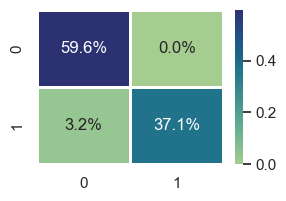

In [405]:
train_prediction = knn.predict(xtrain)
print(confusion_matrix(ytrain, train_prediction))

revealer = confusion_matrix(train_prediction, ytrain)
revealer
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

In [406]:
test_prediction = knn.predict(xtest)
print(classification_report(ytest, test_prediction))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.93      1.00      0.96        26

    accuracy                           0.97        70
   macro avg       0.96      0.98      0.97        70
weighted avg       0.97      0.97      0.97        70



[[42  2]
 [ 0 26]]


<Axes: >

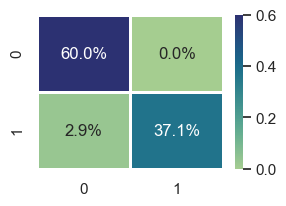

In [407]:

test_prediction = knn.predict(xtest)
print(confusion_matrix(ytest, test_prediction))

revealer = confusion_matrix(test_prediction, ytest)
revealer
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

TEST DATA

In [408]:
kd_test = pd.read_csv('KidneyDiseaseTest.csv')
kd_test.head(2)

,Unnamed: 0,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,345,345,22.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,97.0,18.0,1.2,138.0,4.3,13.5,42.0,7900.0,6.4,no,no,no,good,no,no,notckd
1,276,276,20.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,NaN,NaN,NaN,137.0,4.7,14.0,41.0,4500.0,5.5,no,no,no,good,no,no,notckd


In [409]:
kd_test.isnull().sum()

Unnamed: 0                  0
id                          0
age                         2
blood_pressure              2
specific gravity            7
albumin                     6
sugar                       6
red blood cells            14
pus cell                    9
pus cell clumps             2
bacteria                    2
blood glucose random        5
blood urea                  2
serum creatinine            2
sodium                      9
potassium                   9
hemoglobin                  9
packed cell volume         10
white blood cell count     11
red blood cell count       17
hypertension                0
diabetes mellitus           0
coronary artery disease     0
appetite                    0
pedal edema                 0
anemia                      0
classes                     0
dtype: int64

In [410]:
cat = kd_test.select_dtypes(include = ['object', 'category'])
num = kd_test.select_dtypes(include = 'number')

In [411]:
# # to convert the cloumns that meant to be in int (but in object) back to it correct datatype
# kd_test['packed cell volume'] = pd.to_numeric(test['packed cell volume'], errors = 'coerce')
# kd_test['red blood cell count'] = pd.to_numeric(test['packed cell volume'], errors = 'coerce')
# kd_test['white blood cell count'] = pd.to_numeric(test['white blood cell count'], errors = 'coerce')

# # Check if the corrections has been effected
# kd_test.select_dtypes(include = ['object', 'category'])
# kd_test.head(3)

In [412]:
cleandata(kd_test)
kd_test.isnull().sum()

Unnamed: 0                 0
id                         0
age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
classes                    0
dtype: int64

In [413]:
# standardscale and labelEncode
transform(kd_test)
kd_test.head()

,Unnamed: 0,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,classes
0,1.141696,1.141696,-1.605794,-1.371760,1.226569,-0.700649,-0.44796,1,1,0,0,-0.786540,-1.022969,-0.500032,0.108176,0.060728,0.432277,0.370226,-0.060368,2.189044,0,0,0,0,0,0,1
1,0.527019,0.527019,-1.712847,-1.371760,1.226569,-0.700649,-0.44796,1,1,0,0,-0.379331,-0.340162,-0.423993,-0.055727,0.699966,0.621540,0.247635,-1.296818,1.034214,0,0,0,0,0,0,1
2,-0.987403,-0.987403,-0.107053,1.107325,0.169182,-0.700649,-0.44796,1,1,0,0,-0.911835,1.459965,0.990331,-1.694754,0.220537,-2.406670,-2.694558,-0.569494,0.007699,1,1,0,0,1,1,0
3,1.302046,1.302046,0.802897,0.280963,1.226569,-0.700649,-0.44796,1,1,0,0,-0.755216,-0.476723,-0.712941,0.108176,-0.099082,2.059940,0.615409,-0.787691,0.649271,0,0,0,0,0,0,1
4,-0.800327,-0.800327,1.017003,-1.371760,-0.888205,2.413347,-0.44796,1,1,0,0,-0.457640,1.633771,0.747006,-0.219630,1.019586,-0.362628,-0.487914,2.594363,-0.505559,1,1,0,1,1,0,0


In [414]:
kd_test.drop('Unnamed: 0', axis = 1, inplace = True)

In [415]:
x2 = kd_test.drop('classes', axis = 1)
y2 = kd_test.classes

In [416]:
test_pred= knn.predict(x2)
print(classification_report(test_pred, y2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.90      0.95        21

    accuracy                           0.96        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.96      0.96      0.96        50



**DECISION TREE**

In [417]:
from sklearn.ensemble import DecisionTreeClassifier

treeModel = DecisionTreeClassifier()
treeModel.fit(xtrain, ytrain)
train_pred = treeModel.predict(xtrain)
print(classification_report(ytrain, train_pred))